In [7]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
mean_absolute_errors = []
CI_sizes = []
percent_inside_CI = []

with open('experiment1/trainedSVC/evalSVC/state1/data_summary.txt', 'r') as file:
    # Read all lines into a list
    lines1 = file.readlines()
    
with open('experiment1/trainedSVC/evalSVC/state8/data_summary.txt', 'r') as file:
    # Read all lines into a list
    lines2 = file.readlines()
    
with open('experiment1/trainedSVC/evalSVC/state42/data_summary.txt', 'r') as file:
    # Read all lines into a list
    lines3 = file.readlines()

mean_absolute_errors.extend(eval(lines1[0]))
mean_absolute_errors.extend(eval(lines2[0]))
mean_absolute_errors.extend(eval(lines3[0]))

percent_inside_CI.extend(eval(lines1[2]))
percent_inside_CI.extend(eval(lines2[2]))
percent_inside_CI.extend(eval(lines3[2]))

CI_sizes.extend(eval(lines1[4]))
CI_sizes.extend(eval(lines2[4]))
CI_sizes.extend(eval(lines3[4]))

print("Done")

Done


0.08935518749160422
0.15115784
0.40728149058678914
0.08037876118275192


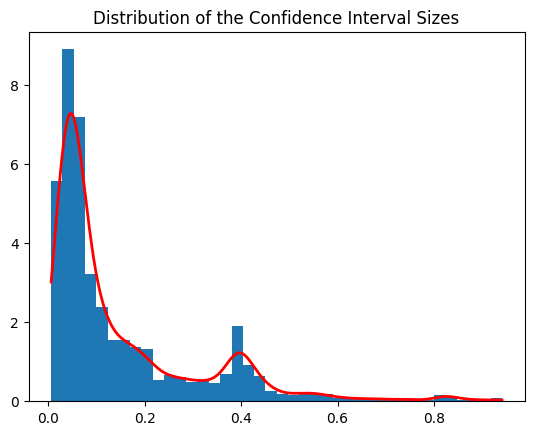

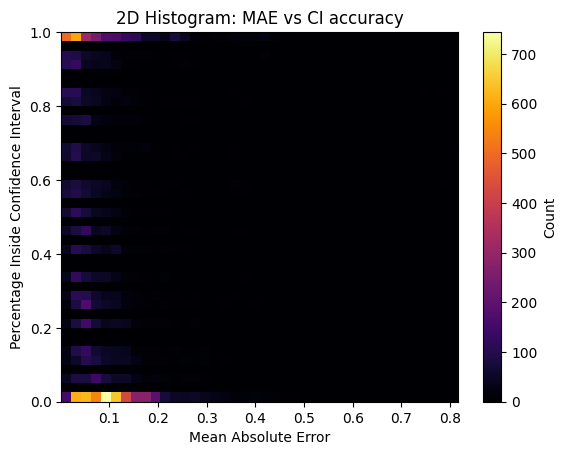

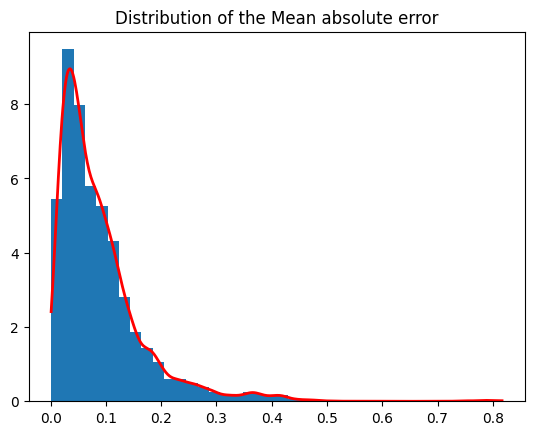

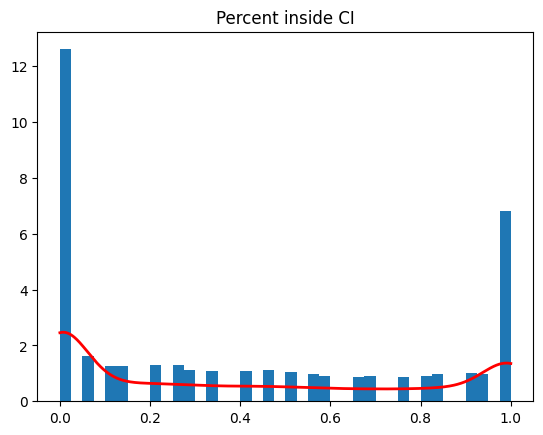

In [17]:
avg_MAE = np.average(mean_absolute_errors)
avg_CI_sizes = np.average(CI_sizes)
avg_percent_in_CI = np.average(percent_inside_CI)
stdev_MAE = np.std(mean_absolute_errors)
print(avg_MAE)
print(avg_CI_sizes)
print(avg_percent_in_CI)
print(stdev_MAE)

def create_CI_plot():
    plt.hist(CI_sizes, bins=40, density=True)
    plt.title("Distribution of the Confidence Interval Sizes")
    
    kde = scipy.stats.gaussian_kde(CI_sizes)
    x_vals = np.linspace(min(CI_sizes), max(CI_sizes), 500)
    plt.plot(x_vals, kde(x_vals), 'r-', linewidth=2, label='KDE')

def create_MEA_PercentCI():
    plt.hist2d(x=mean_absolute_errors, 
           y=percent_inside_CI, 
           bins=(40,40), 
           cmap="inferno")
    plt.colorbar(label='Count')
    plt.xlabel('Mean Absolute Error')
    plt.ylabel('Percentage Inside Confidence Interval')
    plt.title('2D Histogram: MAE vs CI accuracy')


create_CI_plot()
plt.show()

create_MEA_PercentCI()
plt.show()

plt.hist(mean_absolute_errors, bins=40, density=True)
plt.title("Distribution of the Mean absolute error")

kde = scipy.stats.gaussian_kde(mean_absolute_errors)
x_vals = np.linspace(min(mean_absolute_errors), max(mean_absolute_errors), 500)
plt.plot(x_vals, kde(x_vals), 'r-', linewidth=2, label='KDE')
plt.show()

plt.hist(percent_inside_CI, bins=40, density=True)
plt.title("Percent inside CI")

kde = scipy.stats.gaussian_kde(percent_inside_CI)
x_vals = np.linspace(min(percent_inside_CI), max(percent_inside_CI), 500)
plt.plot(x_vals, kde(x_vals), 'r-', linewidth=2, label='KDE')
plt.show()

In [10]:
# import os
# 
# output_dir = f"experiment1/trainednn/evalnn/aggregate"
# os.makedirs(output_dir, exist_ok=True)
# 
# with open(f"{output_dir}/data_summary.txt", "w") as f:
#     f.write(mean_absolute_errors.__str__())
#     f.write("\n")
#     f.write(avg_MAE.__str__())
#     f.write("\n")
#     f.write(percent_inside_CI.__str__())
#     f.write("\n")
#     f.write(avg_percent_in_CI.__str__())
#     f.write("\n")
#     f.write(CI_sizes.__str__())
#     f.write("\n")
#     f.write(avg_CI_sizes.__str__())
#     
# create_CI_plot()
# plt.savefig(f"{output_dir}/ci_sizes.png")
# plt.close()
# 
# create_MEA_PercentCI()
# plt.savefig(f"{output_dir}/MEA_vs_PercentInCI")
# plt.close()